# CS229 Problem Set 1
## Problem 1: 逻辑回归

## 符号定义：
- $x^{(i)}$为第i个样本向量
- $x^{(i)} _j$为第i个样本中第j个特征的值
- $y^{(i)}$为第i个样本的标签值


## 问题定义：
对标签$y^{(i)} \in \lbrace -1,1 \rbrace$的**平均经验损失**目标函数，使用**牛顿方法**拟合出参数$\theta$。

**目标函数**：
$$J(\theta)=\frac{1}{m} \sum_{i=1}^{m} \log \left(1+e^{-y^{(i)} \theta^{T} x^{(i)}}\right)=-\frac{1}{m} \sum_{i=1}^{m} \log \left(h_{\theta}\left(y^{(i)} x^{(i)}\right)\right)$$

**牛顿方法-参数更新公式**：
$$
\theta :=\theta-H^{-1} \nabla_{\theta} J(\theta)
$$

**目标函数的一阶和二阶偏导如下：**
$$\nabla_{\theta} J(\theta)= - \frac{1}{m} \sum_{i=1}^{m} y^{(i)}x^{(i)} h_\theta (-y^{(i)}x^{(i)})$$
$$H = \frac{1}{m} \sum_{i=1}^{m} x^{(i)}x^{(i)T}[h_\theta (-y^{(i)}x^{(i)})(1-h_\theta(-y^{(i)}x^{(i)})) ]$$

### 1. 导入库文件

In [1]:
import numpy as np # imports a fast numerical programming library
import matplotlib.pyplot as plt
import pandas as pd #lets us handle data as dataframes

### 2. 读取数据，初始化

In [2]:
df_x = pd.read_csv('data/logistic_x.txt', sep= "\ +", names=["x1","x2"] ,header=None, engine='python')
df_y  = pd.read_csv('data/logistic_y.txt', sep="\ +", names=["y"],header = None ,engine="python")

x = np.hstack((np.ones((df_x.shape[0],1)),df_x.values)) # 增加一列x0
y = df_y.values
m = x.shape[0]
n = x.shape[1]
theta = np.zeros((n,1))

### 3. 参数学习

In [3]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [4]:
def grad_l(theta,x,y):
    z = y *x.dot(theta)
    res = (-1/m)*np.dot(x.T,sigmoid(-z)*y)  ## 此sigmoid 中的参数应为 -
    return res

In [5]:
def Hessian_l(theta,x,y):
    H = np.zeros((n,n))
    for i in range(m):
        a = np.array(x[i]).reshape((3, 1))
        h_theta = sigmoid(-y[i]*(np.dot(x[i],theta)))
        H += np.dot(a,a.T)*(h_theta*(1-h_theta))  # 向量的点积需要注意shape
    H = H/m
    return H

In [6]:
def Newton(theta,eps,x,y):
    for i in range(eps):
        G = grad_l(theta,x,y)
        H = Hessian_l(theta,x,y)
        theta = theta - np.linalg.inv(H).dot(G)
    return theta
    print("theta",theta)
theta = Newton(theta,20,x,y);
print("theta:"+str(theta))

theta:[[-2.6205116 ]
 [ 0.76037154]
 [ 1.17194674]]


### 4. 可视化

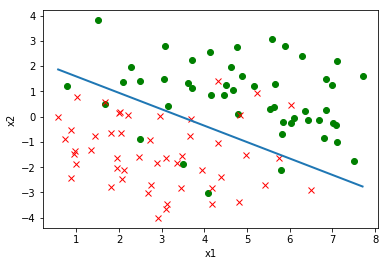

In [7]:
def scatter_data(theta):
    pos,_ = np.where(y>0)
    x1 = x[pos,1]
    x2 = x[pos,2]
    plt.plot(x1,x2,'go')            # 绘制当y>0的点
    pos, _ = np.where(y < 0)
    x1 = x[pos, 1]
    x2 = x[pos, 2]
    plt.plot(x1,x2,'rx')           # 绘制当y<0的点
    x1 = np.linspace(np.min(x[:,1]),np.max(x[:,1]),100)
    x2 = -(theta[0]+theta[1]*x1)/theta[2]
    plt.plot(x1,x2,linewidth=2)   #绘制超平面
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
scatter_data(theta)